In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [461]:
#Loading Data Set into variable

In [462]:
df = pd.read_csv('Avocado.csv')

#In given dataset,there are blank rows from row number 1518. if we keep those rows then it will affect our data even we replace those values. thats why i remove all those records for better result. 

In [463]:
# Here I am loading the data set into a variable “df” and processing the first 5 rows

In [464]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [465]:
# Checking shape of our dataset
df.shape

(1517, 14)

In [466]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [467]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# The Feature "Unnamed:0" is just a representation of the indexes, which does not play any important role for prediction in the price of avocado, so we will drop this column

In [468]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# lest check our datset again

In [469]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


from the first view there are no null valuses. but there is date column so we will seprate the date column into 2 different column one is day and other is month and year is already present in our dataset

In [471]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [472]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


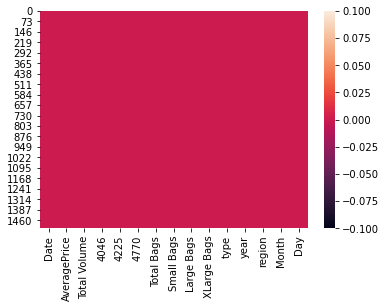

In [473]:
sns.heatmap(df.isnull())

I am checking the null values, as find there are no null values in the data set

DATA VISULALIZATION

Bar Plot

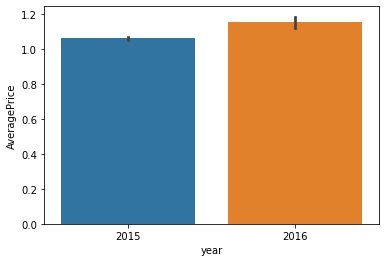

In [474]:
sns.barplot(x="year",y="AveragePrice",data=df)

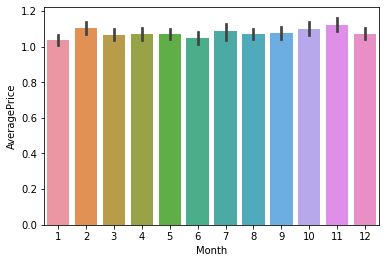

In [475]:
sns.barplot(x="Month",y="AveragePrice",data=df)

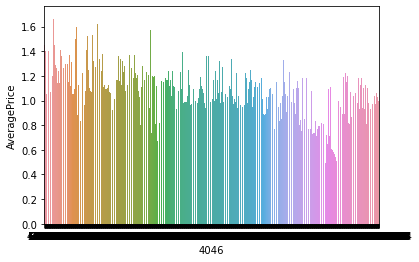

In [476]:
sns.barplot(x="4046",y="AveragePrice",data=df)

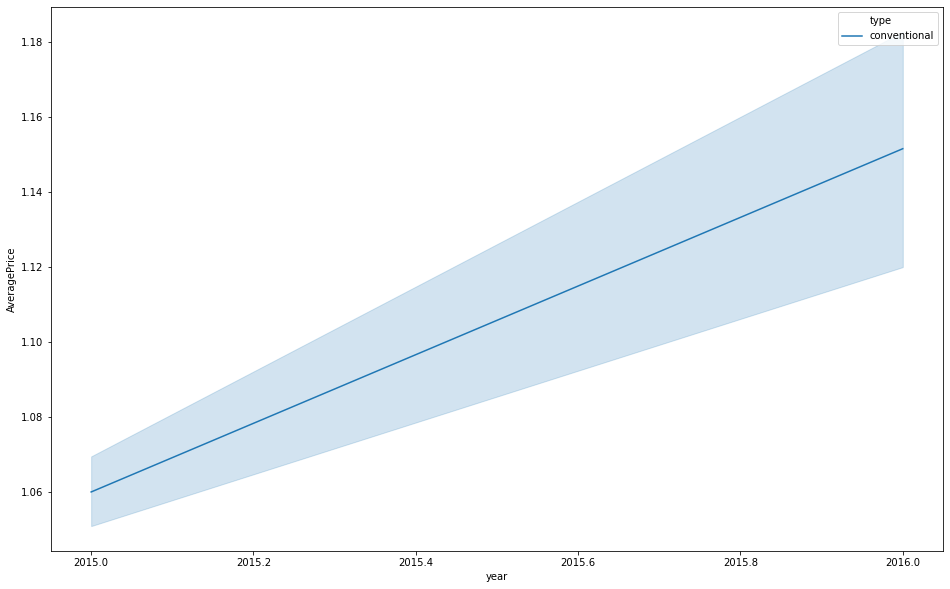

In [477]:
plt.figure(figsize=(16,10))
sns.lineplot(x="year",y="AveragePrice",hue='type',data=df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155510565E0>,
      dtype=object)

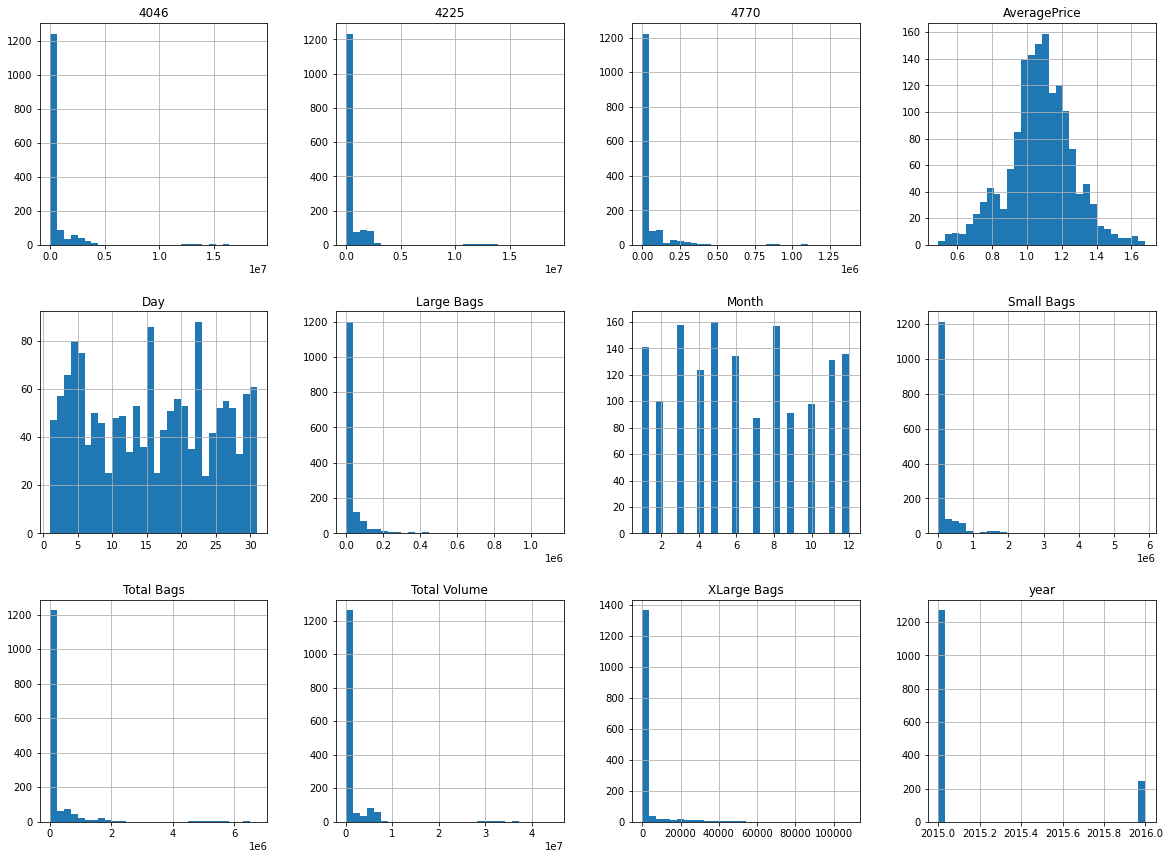

In [478]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

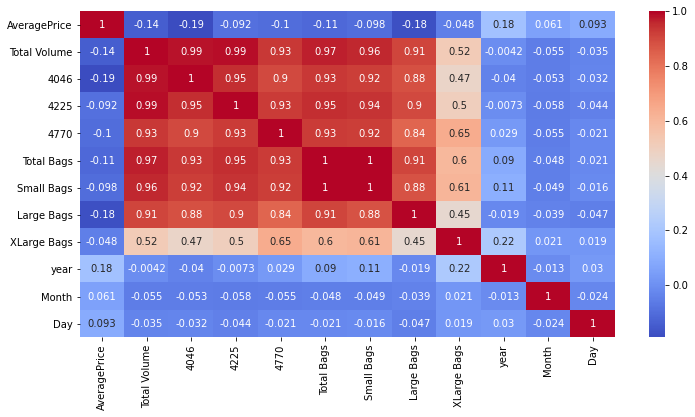

In [479]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [480]:
df['type'].nunique()

1

In [481]:
df['region'].nunique()

51

I will drop region and date column as i have 3 seprate column and for region column will 

In [482]:
df.drop(['region','Date'],axis=1,inplace=True)

In [483]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,29


In [484]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

I will perform label encoding

In [485]:
from sklearn.preprocessing import LabelEncoder

In [486]:
le = LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [487]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
Month             int64
Day               int64
dtype: object

In [488]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


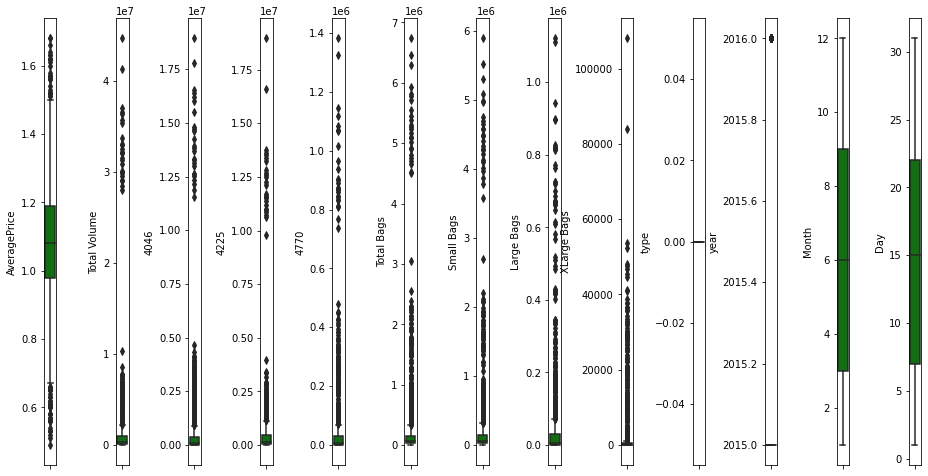

In [489]:
collist = df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [490]:
df_x=df.drop(columns=['AveragePrice'])
y=df[['AveragePrice']]

In [491]:
def iqr_cap(df,cols,factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3-q1
        
        upper_limit = q3 +(factor*iqr)
        lower_limit = q1 -(factor*iqr)
        
        df[col]=np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))

In [492]:
iqr_cap(df_x,df_x,1.5)

In [493]:
df_x.skew()

Total Volume    1.176935
4046            1.212500
4225            1.220883
4770            1.170573
Total Bags      1.104160
Small Bags      1.166098
Large Bags      1.230728
XLarge Bags     1.178417
type            0.000000
year            0.000000
Month           0.101439
Day             0.041303
dtype: float64

In [494]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
        df_x[i]=np.cbrt(df_x[i])
    if df_x[i].skew()<-0.5:
        df_x[i]=np.cbrt(df_x[i])
        
df_x.skew()

Total Volume    0.476675
4046            0.381440
4225            0.502072
4770            0.273031
Total Bags      0.383600
Small Bags      0.477526
Large Bags      0.305380
XLarge Bags     0.769899
type            0.000000
year            0.000000
Month           0.101439
Day             0.041303
dtype: float64

In [495]:
lr=LinearRegression()
from sklearn.metrics import r2_score

In [496]:
for i in range(0,200):
    df_x_train,df_x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.2,random_state=i)
    lr.fit(df_x_train,y_train)
    pred_train = lr.predict(df_x_train)
    pred_test = lr.predict(df_x_test)
    print("At Random State",i,"the traning accuracy is :-", r2_score(y_train,pred_train))
    print("\n")

At Random State 0 the traning accuracy is :- 0.43266648090131743


At Random State 1 the traning accuracy is :- 0.39898660291068144


At Random State 2 the traning accuracy is :- 0.4028515910771555


At Random State 3 the traning accuracy is :- 0.44204496294928997


At Random State 4 the traning accuracy is :- 0.45365403138406557


At Random State 5 the traning accuracy is :- 0.43063695806604585


At Random State 6 the traning accuracy is :- 0.42831191261358137


At Random State 7 the traning accuracy is :- 0.436930280010419


At Random State 8 the traning accuracy is :- 0.4076928615987855


At Random State 9 the traning accuracy is :- 0.4237185130269645


At Random State 10 the traning accuracy is :- 0.41921555344178096


At Random State 11 the traning accuracy is :- 0.4201874995247912


At Random State 12 the traning accuracy is :- 0.4172670663694912


At Random State 13 the traning accuracy is :- 0.4337975558265129


At Random State 14 the traning accuracy is :- 0.44353742627647785


At Random State 127 the traning accuracy is :- 0.4242530295861118


At Random State 128 the traning accuracy is :- 0.41757095165288705


At Random State 129 the traning accuracy is :- 0.4274095569671492


At Random State 130 the traning accuracy is :- 0.428233865324112


At Random State 131 the traning accuracy is :- 0.40719196525490453


At Random State 132 the traning accuracy is :- 0.4212198876700748


At Random State 133 the traning accuracy is :- 0.4314328103485744


At Random State 134 the traning accuracy is :- 0.4387766544617433


At Random State 135 the traning accuracy is :- 0.40941789602096623


At Random State 136 the traning accuracy is :- 0.41143813007811314


At Random State 137 the traning accuracy is :- 0.43890073579599664


At Random State 138 the traning accuracy is :- 0.4461835150180027


At Random State 139 the traning accuracy is :- 0.4040769852621727


At Random State 140 the traning accuracy is :- 0.43347431594535624


At Random State 141 the traning accuracy is

In [497]:
df_x_train,df_x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.2,random_state=187)

In [499]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [500]:
rf = RandomForestRegressor()
rf.fit(df_x_train,y_train)
rf.score(df_x_train,y_train)
predrf = rf.predict(df_x_test)

rfs = r2_score(y_test,predrf)
print('R2 Score',rfs*100)

R2 Score 73.92547121219873


In [501]:
import pickle
filename = 'avocado.pkl'
pickle.dump(rf,open(filename,'wb'))

In [502]:
loaded_model = pickle.load(open('avocado.pkl','rb'))
result = loaded_model.score(df_x_test,y_test)
print(result)

0.7392547121219872
